In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Features

In [2]:
# income	            Income of the user	                          int
# age	                Age of the user	                              int
# experience	        Professional experience of the user in years	int
# profession	        Profession	                                  string
# married	            Whether married or single	                    string
# house_ownership	    Owned or rented or neither	                  string
# car_ownership	      Does the person own a car	                    string
# risk_flag	          Defaulted on a loan	                          string
# currentjobyears	    Years of experience in the current job	      int
# currenthouseyears	  Number of years in the current residence	    int
# city	              City of residence	                            string
# state	              State of residence	                          string


In [3]:
# Import Libraries
import pandas as pd
#----------------------------------------------------
#reading data
data = pd.read_csv('Training Data.csv')

data.describe()


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [4]:
print(' Data is \n' , data.head())


 Data is 
    Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_

In [5]:
def count_unique_values(data):
    
    total = data.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))
count_unique_values(data)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Total,252000,252000,252000,252000,252000,252000,252000,252000,252000,252000,252000,252000,252000
Uniques,252000,41920,59,21,2,3,2,51,317,29,15,5,2


In [6]:
data.drop("Id", axis =1, inplace = True)

<AxesSubplot:>

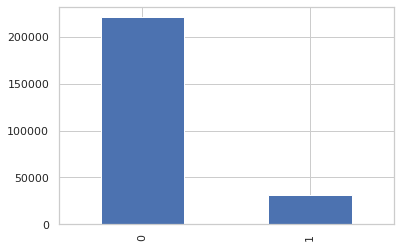

In [7]:
data['Risk_Flag'].value_counts().plot(kind = 'bar')


In [8]:
data['Profession'] = data['Profession'].str.replace('[^a-zA-Z]', ' ')
data['STATE'] = data['STATE'].str.replace('[^a-zA-Z]', ' ')
print(' Data is \n' , data.head())



 Data is 
     Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   
2  3991815   66           4        married          rented            no   
3  6256451   41           2         single          rented           yes   
4  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical engineer                 Rewa  Madhya Pradesh                3   
1   Software Developer             Parbhani     Maharashtra                9   
2     Technical writer            Alappuzha          Kerala                4   
3   Software Developer          Bhubaneswar          Odisha                2   
4        Civil servant  Tiruchirappalli[10]      Tamil Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


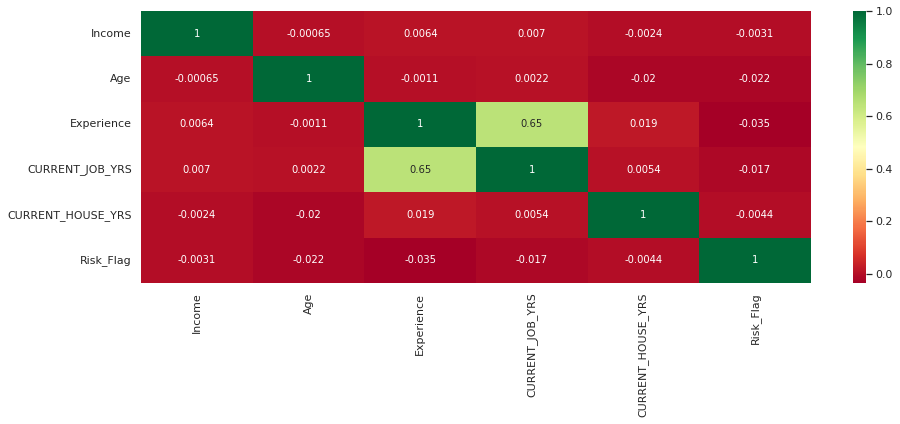

In [10]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# We heave implanced data

In [11]:
# !pip install -U klib


In [12]:

import klib
import pandas as pd

df = pd.DataFrame(data)

GridSpec(6, 6)

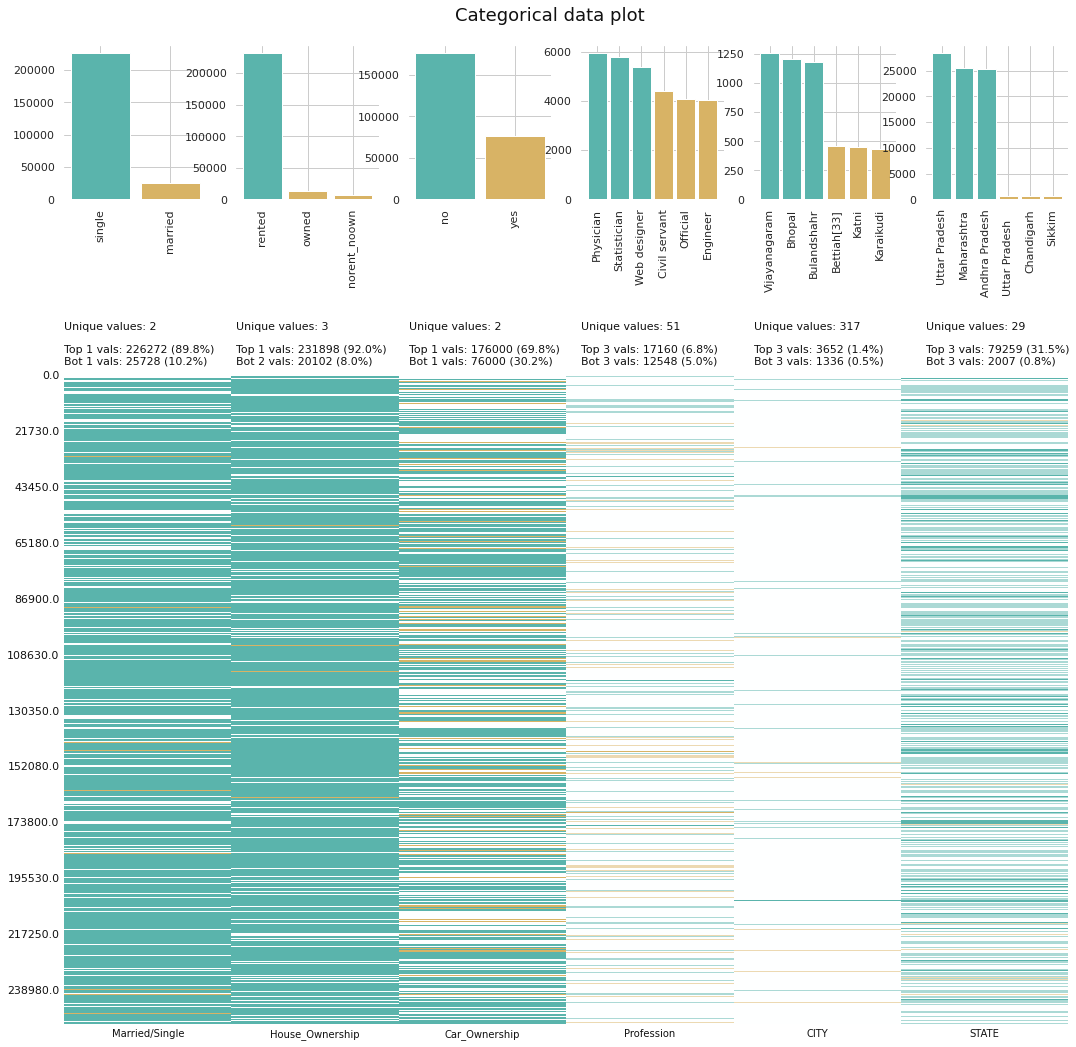

In [13]:
#visualization of the number and frequency of categorical features
klib.cat_plot(data)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='Density'>

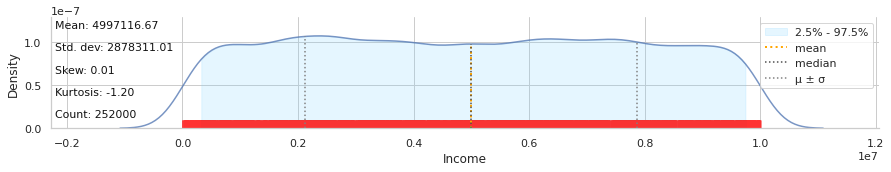

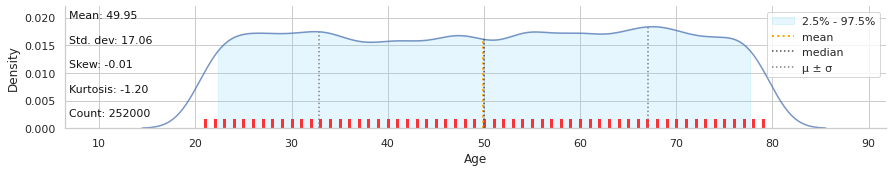

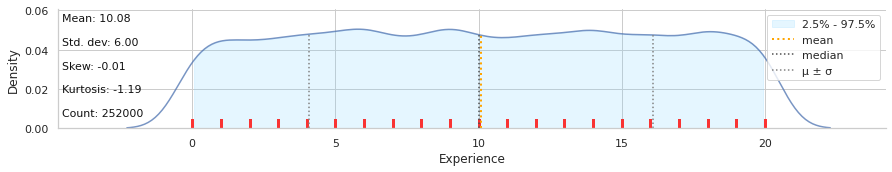

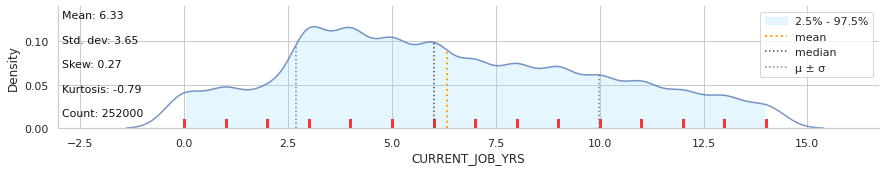

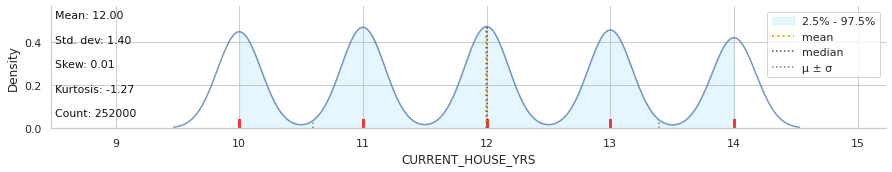

In [14]:
#distribution plot for every numeric feature
klib.dist_plot(data)


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

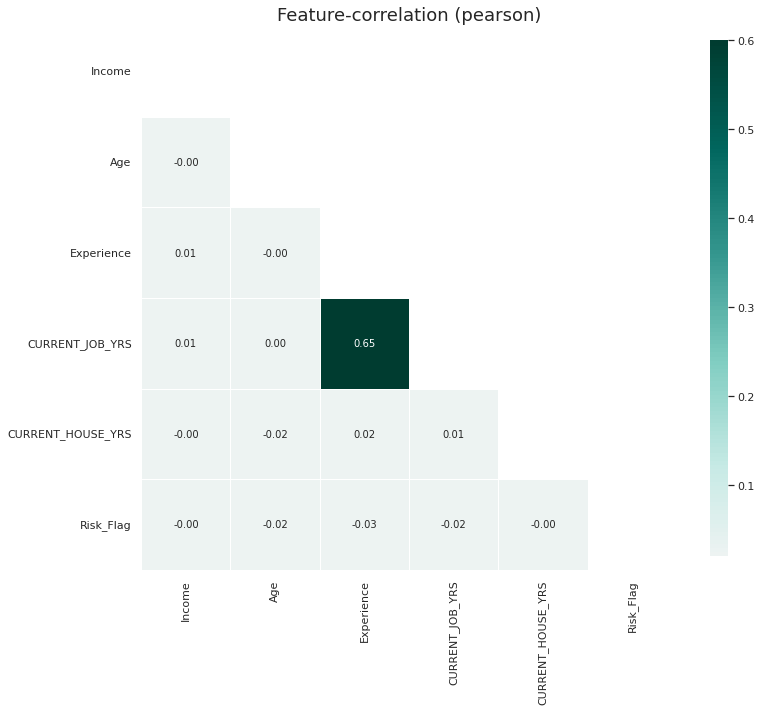

In [15]:
klib.corr_plot(data)

In [ ]:
# Create New Feature, Has the applicant ever worked anywhere other than his current job?
def chprof(df):
    return 0 if df==0 else 1

data['Have_Changed_Profession'] = data['Experience'] - data['CURRENT_JOB_YRS']
data['Have_Changed_Profession'] = data['Have_Changed_Profession'].apply(chprof)


In [ ]:
# Create feature based on Experience
ranges = [-1,2,5,10,20]
cat = ['Entry','Intermediate','Mid','Senior']
data['ExpLevel'] = pd.cut(data['Experience'],bins=ranges, labels=cat).astype('string')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data['Income']=minmax.fit_transform(data[['Income']])
# Create feature based on Income
ranges = [-1.0,0.4,0.7,1.0]
cat = ['Low','Mid','High']
data['IncLevel'] = pd.cut(data['Income'],bins=ranges, labels=cat).astype('string')

In [ ]:
# !pip3 install category_encoders

import category_encoders as ce

high_card_features = ['Profession', 'CITY', 'STATE']

count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))

In [ ]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Have_Changed_Profession,ExpLevel,IncLevel,Profession_count,CITY_count,STATE_count
0,0.129487,23,3,single,rented,no,Mechanical engineer,Rewa,Madhya Pradesh,3,13,0,0,Intermediate,Low,5217,798,14122
1,0.757206,40,10,single,rented,no,Software Developer,Parbhani,Maharashtra,9,13,0,1,Mid,High,5053,849,25562
2,0.398564,66,4,married,rented,no,Technical writer,Alappuzha,Kerala,4,10,0,0,Intermediate,Low,5195,688,5805
3,0.625263,41,2,single,rented,yes,Software Developer,Bhubaneswar,Odisha,2,12,1,0,Entry,Mid,5053,607,4658
4,0.576454,47,11,single,rented,no,Civil servant,Tiruchirappalli[10],Tamil Nadu,3,14,1,1,Senior,Mid,4413,809,16537


In [ ]:
# data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)


In [ ]:
# This will turn all of the string value into category values
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

#Finding Categorical Featurs
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'category' ]
print(categorical_features )

#convert all cols to numbers
cols= categorical_features  
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'ExpLevel', 'IncLevel']


In [ ]:
#X Data
X = data.drop(['Risk_Flag'], axis=1, inplace=False)
print('X Data is \n' , X.head())
print('X shape is ' , X.shape)

#y Data
y = data['Risk_Flag']
print('y Data is \n' , y.head())
print('y shape is ' , y.shape)

X Data is 
      Income  Age  Experience  Married/Single  House_Ownership  Car_Ownership  \
0  0.129487   23           3               1                2              0   
1  0.757206   40          10               1                2              0   
2  0.398564   66           4               0                2              0   
3  0.625263   41           2               1                2              1   
4  0.576454   47          11               1                2              0   

   Profession  CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0          33   251     13                3                 13   
1          43   227     14                9                 13   
2          47     8     12                4                 10   
3          43    54     17                2                 12   
4          11   296     22                3                 14   

   Have_Changed_Profession  ExpLevel  IncLevel  Profession_count  CITY_count  \
0                        0    

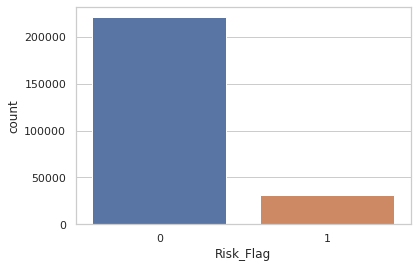

In [ ]:
sns.countplot(x=y)

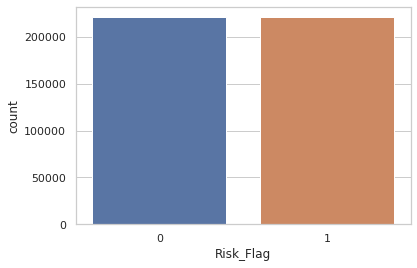

In [ ]:
#Oversampling the Target vaiable using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)
sns.countplot(x=y)

In [ ]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#----------------------------------------------------
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])



In [ ]:
#Import Libraries
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
## Hyperparameter optimization using RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
# classifier=xgboost.XGBClassifier()
# random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# from datetime import datetime
# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X_train,y_train)
# timer(start_time) # timing ends here for "start_time" variable

# print(random_search.best_estimator_)
# print("===================================================")
# print(random_search.best_params_)



In [ ]:
###But best params
#{'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.4, 'colsample_bytree': 0.7}

import xgboost

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.3,
       colsample_bytree=0.7, gamma=0.4, learning_rate=0.25,
       max_delta_step=0, max_depth=12, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

classifier.fit(X_train,y_train)


#Calculating Details
print('XGBClassifier Train Score is : ' , classifier.score(X_train, y_train))
print('XGBClassifier Test Score is : ' , classifier.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
#Calculating Prediction
y_pred = classifier.predict(X_test)
print("The Real Value Is    :",np.array(y_test[30:50]))
print("The Predect Value Is :" ,y_pred[30:50])


from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_test,y_test,cv=10)
print("cross_val_score",score)
print("===================================================")
print("cross_val_score mean: ",score.mean())



cross_val_score [0.92740111 0.92863509 0.927264   0.93116687 0.92554504 0.92568216
 0.92883587 0.92431098 0.92931578 0.92568216]
cross_val_score mean:  0.9273839071698973


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93     72895
           1       0.91      0.96      0.93     72968

    accuracy                           0.93    145863
   macro avg       0.93      0.93      0.93    145863
weighted avg       0.93      0.93      0.93    145863



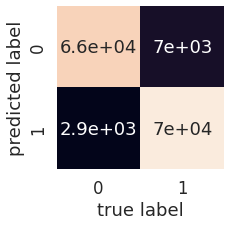

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)

In [ ]:
import pickle
# Save an extisting model to file
pickle.dump(classifier, open("classifier.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("classifier.pkl", "rb"))
print(loaded_pickle_model.score(X_test,y_test))

0.9319292761015473
